In [70]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rcParams
from matplotlib import ticker
rcParams["figure.figsize"] = (10,8)
plt.style.use("science")
import eispac
from glob import glob
import sunpy
from sunpy.io.special import read_genx
import cmcrameri.cm as cmcm
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from astropy.visualization import ImageNormalize, SqrtStretch, LogStretch
from scipy import interpolate
from scipy import ndimage
import juanfit
import importlib
importlib.reload(juanfit)
from juanfit import SpectrumFitSingle, SpectrumFitRow, SpectrumFit2D
rcParams['axes.labelsize'] = 18
rcParams['xtick.labelsize'] = 16
rcParams['ytick.labelsize'] = 16
rcParams['font.size'] = 18
rcParams['figure.figsize'] = [10,10]
rcParams['axes.linewidth'] = 2
rcParams['axes.titlesize'] = 18
from scipy.interpolate import interp1d
import astropy.constants as const
import copy


In [2]:
def plot_colorbar(im, ax, width="3%", height="100%",loc="lower left",fontsize=14,
                bbox_to_anchor=(1.02, 0., 1, 1)):
    clb_ax = inset_axes(ax,width=width,height=height,loc=loc,
                bbox_to_anchor=bbox_to_anchor,
                 bbox_transform=ax.transAxes,
                 borderpad=0)
    clb = plt.colorbar(im,pad = 0.05,orientation='vertical',ax=ax,cax=clb_ax)
    clb_ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(5))
    clb_ax.yaxis.get_offset_text().set_fontsize(fontsize)
    clb_ax.tick_params(labelsize=fontsize)
    return clb, clb_ax

In [3]:
data_filepath = '../../src/EIS/level1/EastOffLimbFullSpectra/eis_20170821_205401.data.h5'
fe_10_184_fit_file = "../../sav/EIS/NPCHDB/eispac_fit/eis_20170821_110818.fe_10_184_536.1c-0.fit.h5"
fe_12_195_fit_file = "../../sav/EIS/NPCHDB/eispac_fit/eis_20170821_110818.fe_12_195_119.2c-0.fit.h5"


Reading fit result from, 
   ../../sav/EIS/NPCHDB/eispac_fit/eis_20170821_110818.fe_10_184_536.1c-0.fit.h5
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


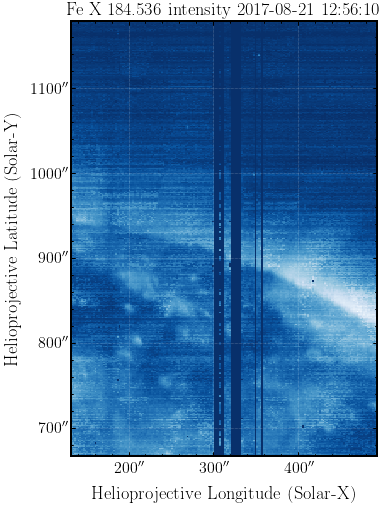

In [47]:
fe_10_184_fit_res = eispac.read_fit(fe_10_184_fit_file)
fe_10_184_inten_map = fe_10_184_fit_res.get_map(component=0, measurement='intensity')
fig = plt.figure(figsize=(6,8))
ax = fig.add_subplot(projection=fe_10_184_inten_map)
fe_10_184_inten_map.plot(axes=ax)

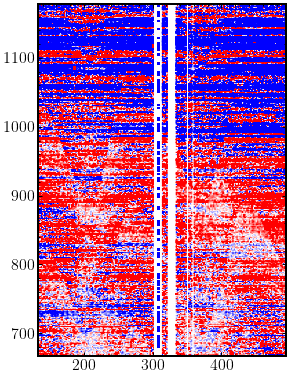

In [82]:
fe_10_184_vel = fe_10_184_fit_res.calculate_velocity(component=0,corr_method="column")
fig, ax = plt.subplots(figsize=(4,6),constrained_layout=True)
ax.imshow(fe_10_184_vel[0], origin="lower", extent=fe_10_184_fit_res.meta["extent_arcsec"],cmap="bwr_r",vmin=-10,vmax=10)

INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


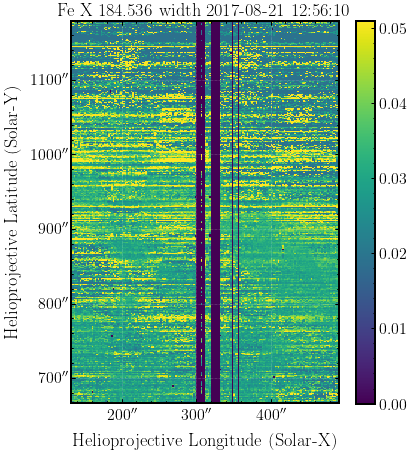

In [5]:
fe_10_184_width_map = fe_10_184_fit_res.get_map(0, 'width')
fig = plt.figure(figsize=(6,8))
ax = fig.add_subplot(projection=fe_10_184_width_map)
fe_10_184_width_map.plot(axes=ax)
plt.colorbar(ax=ax,shrink=0.88)

Reading fit result from, 
   ../../sav/EIS/NPCHDB/eispac_fit/eis_20170821_110818.fe_12_195_119.2c-0.fit.h5
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


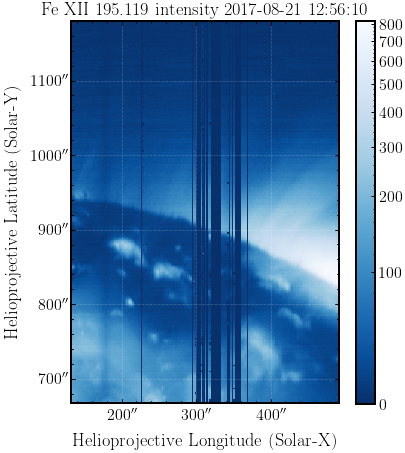

In [6]:
fe_12_195_fit_res = eispac.read_fit(fe_12_195_fit_file)
fe_12_195_inten_map = fe_12_195_fit_res.get_map(component=0, measurement='intensity')
fig = plt.figure(figsize=(6,8))
ax = fig.add_subplot(projection=fe_12_195_inten_map)
fe_12_195_inten_map.plot(axes=ax)
plt.colorbar(ax=ax,shrink=0.88)

INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


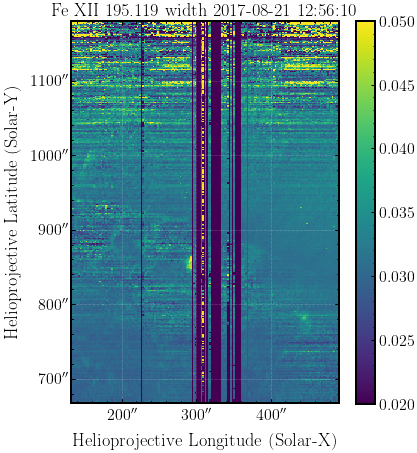

In [7]:
fe_12_195_width_map = fe_12_195_fit_res.get_map(0, 'width')
fig = plt.figure(figsize=(6,8))
ax = fig.add_subplot(projection=fe_12_195_width_map)
fe_12_195_width_map.plot_settings['norm'] = ImageNormalize(vmin=0.02, vmax=0.05)
fe_12_195_width_map.plot(axes=ax)

plt.colorbar(ax=ax,shrink=0.88)

In [101]:
def interp_window_slit_tilt(data,wvl):
    data_shape = data.shape
    data_interp = np.zeros(data_shape)
    for ii in range(data_shape[0]):
        f = interp1d(wvl[ii,:],data[ii,:],kind="linear",fill_value="extrapolate")
        data_interp[ii,:] = f(wvl[0,:])
    
    return data_interp

In [9]:
data_filepath = "../../src/EIS/level1/NPCH_DB/data_eis/eis_20170821_110818.data.h5"

In [10]:
data_cube_FeX_184 = eispac.read_cube(data_filepath,184.537)

Data file,
   /Users/yjzhu/Desktop/Solar/Eclipse2017/src/EIS/level1/NPCH_DB/data_eis/eis_20170821_110818.data.h5
Header file,
   /Users/yjzhu/Desktop/Solar/Eclipse2017/src/EIS/level1/NPCH_DB/data_eis/eis_20170821_110818.head.h5
Found a wavelength 184.54 [Angstroms] in window 2
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]


In [65]:
inst_width_bin = np.mean(data_cube_FeX_184.meta["slit_width"].reshape(-1,16),axis=1)

In [11]:
data_FeX_184 = np.zeros_like(data_cube_FeX_184.data)

In [102]:
for ii in range(180):
    data_FeX_184[:,ii,:] = interp_window_slit_tilt(data_cube_FeX_184.data[:,ii,:],data_cube_FeX_184.wavelength[:,ii,:])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


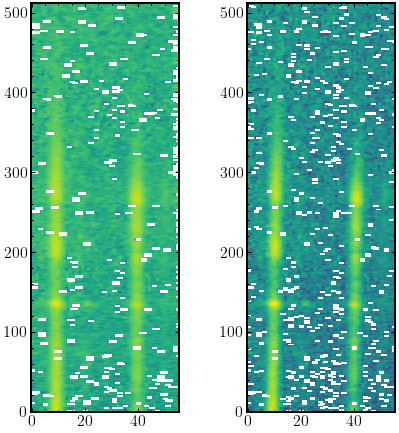

In [103]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(6,6),constrained_layout=True)
ax1.imshow(np.log10(data_FeX_184[:,40,:]),origin="lower",aspect=0.3)
ax2.imshow(np.log10(data_cube_FeX_184.data[:,40,:]),origin="lower",aspect=0.3)

In [110]:
data_FeX_184_mask = copy.deepcopy(data_FeX_184)
data_FeX_184_mask[np.where(data_FeX_184_mask < -50)] = np.nan

In [111]:
FeX_184_slice = slice(0,20)
FeX_184_bin = np.nanmean(data_FeX_184_mask[:,:,FeX_184_slice].reshape(-1,16,180,20),axis=1)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


In [112]:
FeX_184_bin_model = SpectrumFit2D(FeX_184_bin,data_cube_FeX_184.wavelength[0,:,FeX_184_slice],line_number=1,
                            line_wvl_init=[184.5],int_max_init=100,int_cont_init=0,fwhm_init=0.07,same_width=False)
FeX_184_bin_model.run_lse_mp(ncpu=1,prev_init=False,absolute_sigma=False)

Doppler velocity corrected by the median of each raster.
Instrumental width corrected.


/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:1510: RuntimeWarning: invalid value encountered in sqrt
  data_to_plot = np.sqrt(data_to_plot**2 - inst_width[np.newaxis,:]**2)


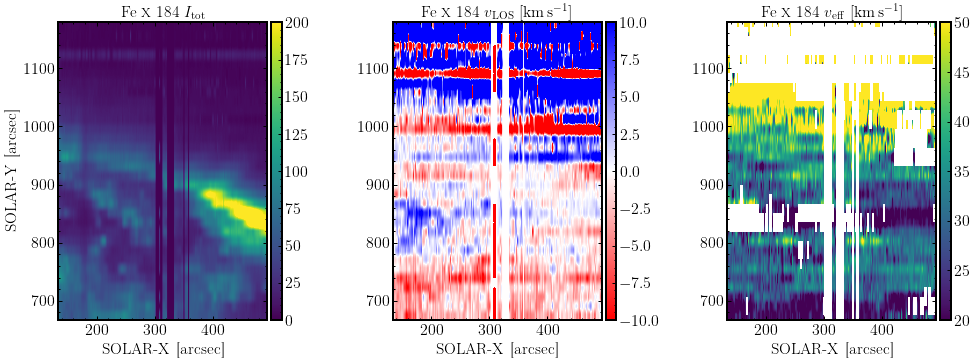

In [117]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(14,5),constrained_layout=True)
FeX_184_bin_model.plot_fit2d(param="int",extent=data_cube_FeX_184.meta["extent_arcsec"],vmin=0,vmax=200,
                    ax=ax1,title=r"Fe \textsc{x} 184 $I_{\rm tot}$",ylabel=r"SOLAR-Y [arcsec]",xlabel=r"SOLAR-X [arcsec]")
FeX_184_bin_model.plot_fit2d(param="vel",extent=data_cube_FeX_184.meta["extent_arcsec"],vmin=-10,vmax=10,
                    ax=ax2,ref_wvl=184.537,title=r"Fe \textsc{x} 184 $v_{\rm LOS}\ \mathrm{[km\,s^{-1}]}$",
                    xlabel=r"SOLAR-X [arcsec]")
FeX_184_bin_model.plot_fit2d(param="veff",extent=data_cube_FeX_184.meta["extent_arcsec"],vmin=20,vmax=50,
                    ax=ax3,ref_wvl=184.537,inst_width=inst_width_bin[:],
                    title=r"Fe \textsc{x} 184 $v_{\rm eff}\ \mathrm{[km\,s^{-1}]}$",
                    xlabel=r"SOLAR-X [arcsec]")

Instrumental width corrected.
Instrumental width corrected.


/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:1512: RuntimeWarning: invalid value encountered in sqrt
  data_to_plot = np.sqrt(data_to_plot**2 - inst_width**2)


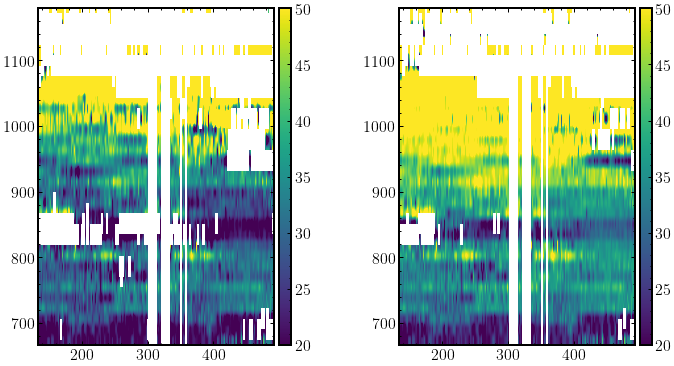

In [114]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5),constrained_layout=True)
FeX_184_bin_model.plot_fit2d(param="veff",extent=data_cube_FeX_184.meta["extent_arcsec"],vmin=20,vmax=50,
                    ax=ax1,ref_wvl=184.537,inst_width=inst_width_bin)
FeX_184_bin_model.plot_fit2d(param="veff",extent=data_cube_FeX_184.meta["extent_arcsec"],vmin=20,vmax=50,
                    ax=ax2,ref_wvl=184.537,inst_width=0.064)

In [83]:
data_cube_FeXII_195 = eispac.read_cube(data_filepath,195.119)

Data file,
   /Users/yjzhu/Desktop/Solar/Eclipse2017/src/EIS/level1/NPCH_DB/data_eis/eis_20170821_110818.data.h5
Header file,
   /Users/yjzhu/Desktop/Solar/Eclipse2017/src/EIS/level1/NPCH_DB/data_eis/eis_20170821_110818.head.h5
Found a wavelength 195.12 [Angstroms] in window 6
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]


In [84]:
data_FeXII_195 = np.zeros_like(data_cube_FeXII_195.data)

In [85]:
for ii in range(180):
    data_FeXII_195[:,ii,:] = interp_window_slit_tilt(data_cube_FeXII_195.data[:,ii,:],data_cube_FeXII_195.wavelength[:,ii,:])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


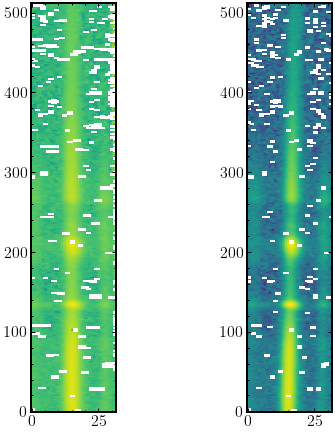

In [86]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(6,6),constrained_layout=True)
ax1.imshow(np.log10(data_FeXII_195[:,40,:]),origin="lower",aspect=0.3)
ax2.imshow(np.log10(data_cube_FeXII_195.data[:,40,:]),origin="lower",aspect=0.3)

In [107]:
data_FeXII_195_mask = copy.deepcopy(data_FeXII_195)
data_FeXII_195_mask[np.where(data_FeXII_195_mask < -100)] = np.nan

FeXII_195_slice = slice(5,25)
FeXII_195_bin = np.nanmean(data_FeXII_195_mask[:,:,FeXII_195_slice].reshape(-1,16,180,20),axis=1)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """


In [108]:
FeXII_195_bin_model = SpectrumFit2D(FeXII_195_bin,data_cube_FeXII_195.wavelength[0,:,FeXII_195_slice],line_number=1,
                            line_wvl_init=[195.1],int_max_init=200,int_cont_init=0,fwhm_init=0.07,same_width=False)
FeXII_195_bin_model.run_lse_mp(ncpu=1,prev_init=False,absolute_sigma=False)

Doppler velocity corrected by the median of each raster.
Instrumental width corrected.


/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:1510: RuntimeWarning: invalid value encountered in sqrt
  data_to_plot = np.sqrt(data_to_plot**2 - inst_width[np.newaxis,:]**2)


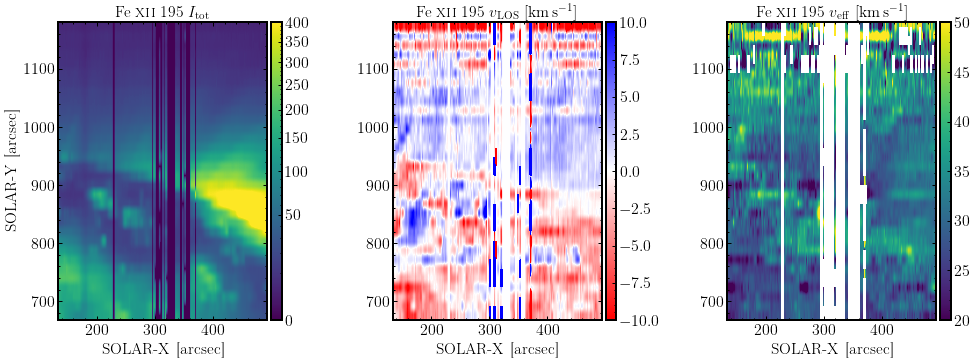

In [115]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(14,5),constrained_layout=True)
FeXII_195_bin_model.plot_fit2d(param="int",extent=data_cube_FeXII_195.meta["extent_arcsec"],vmin=0,vmax=400,
                    ax=ax1,title=r"Fe \textsc{xii} 195 $I_{\rm tot}$",scale="sqrt",ylabel=r"SOLAR-Y [arcsec]",
                    xlabel=r"SOLAR-X [arcsec]")
FeXII_195_bin_model.plot_fit2d(param="vel",extent=data_cube_FeXII_195.meta["extent_arcsec"],vmin=-10,vmax=10,
                    ax=ax2,ref_wvl=195.119,title=r"Fe \textsc{xii} 195 $v_{\rm LOS}\ \mathrm{[km\,s^{-1}]}$",
                    xlabel=r"SOLAR-X [arcsec]")
FeXII_195_bin_model.plot_fit2d(param="veff",extent=data_cube_FeXII_195.meta["extent_arcsec"],vmin=20,vmax=50,
                    ax=ax3,ref_wvl=195.119,inst_width=inst_width_bin[:],
                    title=r"Fe \textsc{xii} 195 $v_{\rm eff}\ \mathrm{[km\,s^{-1}]}$",
                    xlabel=r"SOLAR-X [arcsec]")